<a href="https://colab.research.google.com/github/vansh7nvc/AI-ML/blob/main/ch4_training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRAINING MODELS CH 4


In [ ]:
import numpy as np

In [ ]:
X = 2* np.random.rand(100,1)
Y = 4 + 3* X + np.random.randn(100,1)

In [ ]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

In [ ]:
theta_best

array([[4.12435775],
       [2.92077153]])

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.12435775],
       [9.96590081]])

(np.float64(0.0), np.float64(2.0), np.float64(0.0), np.float64(15.0))

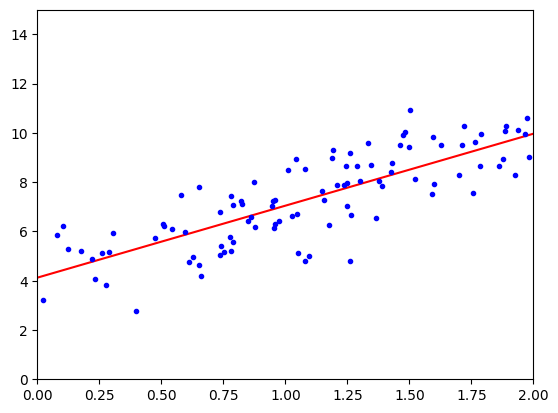

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_new,y_predict,"r-")
plt.plot(X,Y,"b.")
plt.axis([0,2,0,15])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)
lin_reg.intercept_,lin_reg.coef_

(array([4.12435775]), array([[2.92077153]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.12435775],
       [9.96590081]])

In [ ]:
theta_best_svd,_ = np.linalg.qr(X_b.T.dot(X_b))
theta_best_svd

array([[-0.67927302, -0.73388566],
       [-0.73388566,  0.67927302]])

X+ : The pseudoinverse (or Moore-Penrose inverse) is a generalization of the matrix inverse. It can be used to find a solution to a linear system when the matrix is not invertible.

In [ ]:
np.linalg.pinv(X_b).dot(Y)

array([[4.12435775],
       [2.92077153]])

Singular Value Decomposition (SVD) is a fundamental matrix decomposition technique. It decomposes a matrix into three other matrices: U, S, and V.

In the context of linear regression, SVD can be used to compute the pseudoinverse of a matrix, which in turn can be used to find the optimal parameters (theta_best) for the linear model. The pseudoinverse computed using SVD is given by V.dot(np.linalg.pinv(S)).dot(U.T). This is a more numerically stable way to compute the pseudoinverse compared to the normal equation method (using matrix inversion).

While the notebook doesn't explicitly show the full SVD calculation for the pseudoinverse, the result from using np.linalg.pinv(X_b) in cell 07ItVFe7bgbx is based on SVD internally. Cell UpZ7KIJ-bLCS shows a partial calculation related to SVD (specifically the QR decomposition which is related to SVD) but doesn't complete the pseudoinverse calculation using SVD.

X+ = V* S* Ut

# Computational Complexity

The notebook explores different methods for Linear Regression:

1.  **Normal Equation (`np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)`)**:
    *   This method involves matrix multiplication and matrix inversion.
    *   The computational complexity is typically around O(n*d^2 + d^3), where 'n' is the number of instances and 'd' is the number of features. The d^3 term comes from the matrix inversion.
    *   This method can be slow when the number of features (d) is large.

2.  **Singular Value Decomposition (SVD) based Pseudoinverse (`np.linalg.pinv(X_b).dot(Y)`)**:
    *   The `np.linalg.pinv` function uses SVD internally.
    *   The computational complexity of SVD is typically around O(n*d^2) or O(d*n^2), depending on whether n > d or d > n. In the context of linear regression where n >> d, it's closer to O(n*d^2).
    *   This method is generally more numerically stable than the normal equation when the matrix X_b.T.dot(X_b) is close to singular.

3.  **Scikit-learn's `LinearRegression` (`lin_reg.fit(X,Y)`)**:
    *   Scikit-learn's `LinearRegression` uses different optimization algorithms depending on the data and parameters, but for standard linear regression, it often uses an optimized version of the normal equation or an iterative approach like Gradient Descent or variations thereof.
    *   The exact complexity can vary, but for fitting with the normal equation approach, it would be similar to the manual normal equation method. If it uses an iterative method, the complexity depends on the number of iterations and the cost of each iteration (which is typically O(n*d)).

In summary, both the normal equation and SVD-based pseudoinverse have a computational complexity that is polynomial in the number of features (d). For a large number of features, iterative methods like Gradient Descent (not explicitly shown for the final fit in this notebook, but a common alternative) can be more efficient, with a complexity that is linear in the number of features and the number of iterations.

# Gradient descent

## Gradient Descent

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea is to tweak parameters iteratively in order to minimize a cost function.

Imagine you are trying to find the bottom of a valley in the dark. You can't see where the bottom is, but you can feel the slope of the ground beneath your feet. To reach the bottom, you would take a step in the direction of the steepest slope downwards. You would repeat this process, taking small steps in the direction of the steepest descent, until you reach the bottom of the valley.

In machine learning, the "valley" is the cost function, and the "steps" are the adjustments made to the model's parameters. The "slope" is the gradient of the cost function with respect to the parameters. The gradient tells us the direction of the steepest increase in the cost function, so we take steps in the opposite direction to minimize it.

The Gradient Descent algorithm works by:

1.  Initializing the model parameters with random values.
2.  Calculating the gradient of the cost function with respect to each parameter.
3.  Updating the parameters by subtracting a small fraction (learning rate) of the gradient from the current parameters.
4.  Repeating steps 2 and 3 until the cost function converges to a minimum.

There are different variations of Gradient Descent, including:

*   **Batch Gradient Descent**: Calculates the gradient using the entire training dataset in each step. This can be slow for large datasets.
*   **Stochastic Gradient Descent**: Calculates the gradient using only one randomly selected instance from the training dataset in each step. This is much faster than Batch Gradient Descent but can be more erratic.
*   **Mini-batch Gradient Descent**: Calculates the gradient using a small random subset (mini-batch) of the training dataset in each step. This is a compromise between Batch and Stochastic Gradient Descent, offering a balance between speed and stability.

## Gradient Descent Variations

Gradient Descent is an iterative optimization algorithm used to find the minimum of a function. In the context of machine learning, it's commonly used to minimize the cost function of a model by iteratively adjusting the model's parameters (weights and biases).

There are three main types of Gradient Descent, differing in how much data they use to compute the gradient in each step:

1.  **Batch Gradient Descent (BGD):**
    *   **Explanation:** In Batch Gradient Descent, the gradient of the cost function is calculated using the **entire** training dataset for each parameter update.
    *   **Pros:** Provides a more stable and accurate estimate of the gradient, which can lead to convergence to the global minimum (for convex cost functions) or a local minimum (for non-convex cost functions).
    *   **Cons:** Can be very slow and computationally expensive, especially for large datasets, as it requires processing all training instances in each iteration. The entire dataset needs to be in memory.

2.  **Stochastic Gradient Descent (SGD):**
    *   **Explanation:** In Stochastic Gradient Descent, the gradient of the cost function is calculated using only **one randomly selected instance** from the training dataset for each parameter update.
    *   **Pros:** Much faster than Batch Gradient Descent, especially for large datasets, as it processes only one instance at a time. It can also escape local minima in non-convex cost functions due to the randomness in its updates.
    *   **Cons:** The updates are more erratic and can cause the algorithm to jump around the minimum, making it harder to converge to the exact minimum. This can lead to higher variance in the parameter updates.

3.  **Mini-batch Gradient Descent (MBGD):**
    *   **Explanation:** Mini-batch Gradient Descent is a compromise between Batch and Stochastic Gradient Descent. It calculates the gradient using a small, randomly selected **subset (mini-batch)** of the training dataset for each parameter update.
    *   **Pros:** Offers a balance between the speed of SGD and the stability of BGD. It's more stable than SGD because the gradient is averaged over a small batch, and it's faster than BGD because it doesn't process the entire dataset at once. It's the most commonly used variant in practice.
    *   **Cons:** Requires tuning the mini-batch size, which can impact performance.

Here's a table summarizing the key differences:

| Feature           | Batch Gradient Descent (BGD)       | Stochastic Gradient Descent (SGD)         | Mini-batch Gradient Descent (MBGD)      |
| :---------------- | :--------------------------------- | :---------------------------------------- | :-------------------------------------- |
| Data Used for Gradient | Entire training dataset          | Single randomly selected instance         | Small random subset (mini-batch)        |
| Update Frequency    | Once per epoch                     | Once per instance                       | Once per mini-batch                     |
| Speed             | Slow, especially for large datasets | Fast                                      | Faster than BGD, slower than pure SGD |
| Stability of Updates | Stable                             | Erratic                                   | More stable than SGD, less than BGD    |
| Convergence       | Converges smoothly to minimum       | Oscillates around minimum, can escape local minima | Converges towards minimum with some oscillation |
| Memory Requirement| High (needs entire dataset)        | Low (needs one instance)                  | Moderate (needs a mini-batch)           |
| Common Use        | Less common for large datasets     | Can be used, but often outperformed by MBGD | Most commonly used in practice          |



In [ ]:
eta = 0.1
n_iteration = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.12435775],
       [2.92077153]])

# SGD using a learning schedule

In [ ]:
n_epochs = 50
t0, t1 = 5,50

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = Y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta - eta*gradients


In [ ]:
theta

array([[4.12505977],
       [2.92655926]])

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,Y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.08948251]), array([2.88342413]))

# Polynomial Regression

In [ ]:
m = 100
X = 6 * np.random.rand(m,1) - 3
Y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X[0]

array([0.92321059])

In [ ]:
X_poly[0]

array([0.92321059, 0.85231779])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,Y)
lin_reg.intercept_,lin_reg.coef_

(array([1.92232433]), array([[1.02476869, 0.49220473]]))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=10)
  train_errors,val_errors = [],[]
  for m in range(1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
  plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")

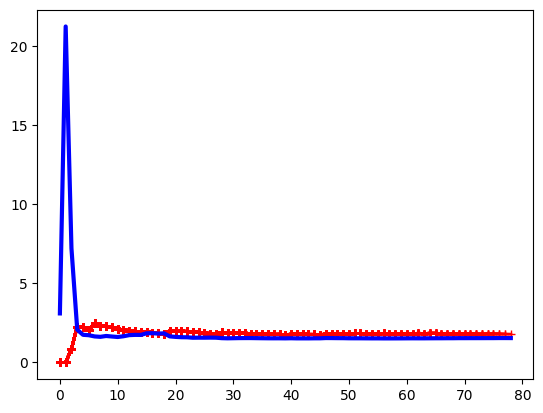

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,Y)

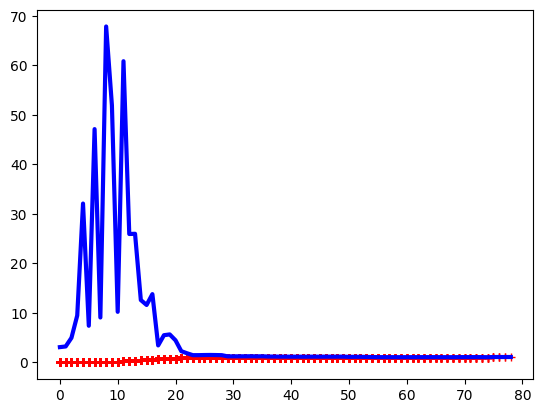

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression()),
])
plot_learning_curves(polynomial_regression,X,Y)

When you look at learning curves, a decreasing gap between the training and validation error curves as the training dataset size increases generally indicates that the model is becoming less overfitted.

Here's why:

Overfitting: Overfitting happens when your model learns the training data too well, including the noise. This results in a very low error on the training set but a high error on unseen validation data. On a learning curve plot, this would typically show a large gap between the low training error and the high validation error, especially with smaller training set sizes.

As the training data increases: With more training data, the model has a harder time memorizing the noise in every single data point. It's forced to find more general patterns that apply to a larger variety of examples. This helps the model generalize better to new data.

Closing the gap: As the model generalizes better, its performance on the validation set improves, and the validation error decreases. The training error might slightly increase (as the model is no longer perfectly fitting the noise), but the key is that the validation error gets closer to the training error. This closing of the gap signifies that the model is less sensitive to the specific training instances and is performing more consistently on both seen and unseen data, which is a sign of reduced overfitting.

So, a narrowing gap as the training set size grows is a good indication that adding more data is helping to combat overfitting and improve the model's generalization ability.



# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver = "cholesky")
ridge_reg.fit(X,Y)
ridge_reg.predict([[1.5]])

array([5.00291519])

# by sgd

In [ ]:
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X,Y.ravel())
sgd_reg.predict([[1.5]])

array([4.97065638])

# LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,Y)
lasso_reg.predict([[1.5]])

array([4.96040628])

# Lasso vs Ridge Regression

Both Lasso (Least Absolute Shrinkage and Selection Operator) and Ridge Regression are regularization techniques used in linear regression to prevent overfitting and improve model generalization. They do this by adding a penalty term to the cost function.

Here's a comparison of the two:

**Ridge Regression:**

*   **Penalty Term:** Adds the L2 norm of the weight vector ($\ell_2$ penalty) to the cost function. The L2 norm is the square root of the sum of the squared weights: $\sum_{i=1}^{n} w_i^2$.
*   **Effect on Weights:** Shrinks the weights towards zero but does not force them to be exactly zero. This means that all features will still contribute to the model, but their influence will be reduced.
*   **Use Cases:** Effective when you have many features that are all potentially relevant to the target variable.

**Lasso Regression:**

*   **Penalty Term:** Adds the L1 norm of the weight vector ($\ell_1$ penalty) to the cost function. The L1 norm is the sum of the absolute values of the weights: $\sum_{i=1}^{n} |w_i|$.
*   **Effect on Weights:** Shrinks the weights towards zero and has a tendency to force some weights to be exactly zero. This means that Lasso can perform feature selection by effectively removing the influence of less important features.
*   **Use Cases:** Useful when you suspect that only a subset of your features are truly relevant to the target variable and you want to identify and select those features.

**Key Differences Summarized:**

| Feature          | Ridge Regression (L2)             | Lasso Regression (L1)                 |
| :--------------- | :-------------------------------- | :------------------------------------ |
| Penalty Term     | Sum of squared weights ($\ell_2$) | Sum of absolute weights ($\ell_1$)    |
| Effect on Weights | Shrinks weights towards zero     | Shrinks weights towards zero and can set some to zero |
| Feature Selection| No intrinsic feature selection   | Performs feature selection            |

In essence, Ridge Regression is good for reducing the impact of less important features while keeping them in the model, while Lasso Regression is good for both reducing the impact of less important features and identifying which features are truly important by setting their weights to zero.

# Elastic net

# Elastic Net

Elastic Net is a regularized linear regression model that combines the L1 and L2 penalties of Lasso and Ridge Regression. The cost function for Elastic Net is a linear combination of the Ridge and Lasso penalty terms:

Cost Function = MSE($\theta$) + $\alpha$ * r * $\sum_{i=1}^{n} |\theta_i|$ + $\alpha$ * (1-r) * $\sum_{i=1}^{n} \theta_i^2$

Where:

*   MSE($\theta$) is the Mean Squared Error.
*   $\alpha$ is the regularization parameter. A higher $\alpha$ value increases the amount of regularization.
*   r is the mix ratio. It controls the mix between L1 and L2 regularization.
    *   If r = 0, Elastic Net is equivalent to Ridge Regression.
    *   If r = 1, Elastic Net is equivalent to Lasso Regression.
    *   If 0 < r < 1, Elastic Net is a combination of Ridge and Lasso.

**Benefits of Elastic Net:**

*   **Combines the strengths of Lasso and Ridge:** Elastic Net can perform feature selection like Lasso while also handling correlated features like Ridge. Lasso can behave erratically when there are highly correlated features, arbitrarily selecting one over the others. Ridge handles correlated features better by shrinking their coefficients together. Elastic Net benefits from both behaviors.
*   **Useful when the number of features is greater than the number of training instances:** In such cases, Lasso might select at most n features, even if all features are relevant. Elastic Net does not have this limitation.

**Use Cases:**

Elastic Net is a good choice when you have a large number of features, some of which are correlated, and you want to perform feature selection while also benefiting from the regularization provided by the L2 penalty. It's often preferred over Lasso when dealing with highly correlated features.

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio=0.5)
elastic_net.fit(X,Y)
elastic_net.predict([[1.5]])

array([4.96249342])

EARLY STOPPING

# Early Stopping

Early Stopping is a regularization technique used to prevent overfitting when training iterative models, such as those trained with Gradient Descent. It works by monitoring the performance of the model on a validation set during training.

The idea is to stop training as soon as the performance on the validation set starts to degrade, even if the performance on the training set is still improving. This is because continued training beyond this point would likely lead to the model learning the noise in the training data rather than the underlying patterns, resulting in overfitting.

Here's how it typically works:

1.  Split your data into training, validation, and test sets.
2.  Train your model on the training set.
3.  At regular intervals during training (e.g., after each epoch), evaluate the model's performance on the validation set using a chosen metric (e.g., Mean Squared Error for regression, accuracy for classification).
4.  Keep track of the best performance achieved on the validation set so far.
5.  If the performance on the validation set does not improve for a certain number of consecutive intervals (known as the "patience"), stop the training.
6.  The model parameters that achieved the best performance on the validation set are considered the optimal parameters.

**Benefits of Early Stopping:**

*   **Prevents Overfitting:** Stops training before the model starts to memorize the noise in the training data.
*   **Saves Computational Resources:** Avoids unnecessary training iterations once the model's performance on unseen data starts to plateau or decline.
*   **Implicit Regularization:** Acts as a form of regularization by limiting the complexity of the model learned during training.

**How to use it in practice:**

Many machine learning libraries and frameworks provide built-in support for early stopping. You typically need to specify the validation set, the monitoring metric, and the patience level.

While the notebook doesn't explicitly demonstrate Early Stopping with code, it's a crucial concept to understand when training iterative models to ensure good generalization performance.

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
poly_scaler = Pipeline([
    ("poly_features",PolynomialFeatures(degree=90,include_bias=False)),
    ("std_scaler",StandardScaler())
])

In [ ]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [ ]:
sgd_reg = SGDRegressor(max_iter=1,tol=None,penalty=None,eta0=0.0005)

In [ ]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled,Y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(Y_val,y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

# LOGISTIC REGRESSION

# Logistic Regression

Logistic Regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many complex extensions exist. It is a classification algorithm, used to predict a binary outcome (e.g., 0 or 1, yes or no, pass or fail).

Despite its name, Logistic Regression is a classification algorithm, not a regression algorithm. It's called "regression" because it uses a linear combination of the input features to predict an output, but this output is then transformed by the logistic function to produce a probability.

**How it works:**

1.  **Linear Combination:** Similar to linear regression, Logistic Regression calculates a weighted sum of the input features: $z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$, where $\theta$ represents the weights and $x$ represents the features.
2.  **Logistic Function:** The result of the linear combination ($z$) is then passed through the logistic function (also known as the sigmoid function), which squashes the output to a value between 0 and 1. The logistic function is defined as: $\sigma(z) = \frac{1}{1 + e^{-z}}$.
3.  **Probability Output:** The output of the logistic function ($\sigma(z)$) can be interpreted as the estimated probability that the instance belongs to the positive class (the class labeled as 1).
4.  **Classification:** To make a classification decision, a threshold is typically applied to the probability output. If $\sigma(z) \ge 0.5$, the instance is classified as the positive class (1); otherwise, it is classified as the negative class (0).

**Key differences from Linear Regression:**

*   **Output:** Linear Regression outputs a continuous value, while Logistic Regression outputs a probability between 0 and 1, which is then used for classification.
*   **Cost Function:** Linear Regression uses Mean Squared Error (MSE) as its cost function. Logistic Regression typically uses the log loss (or cross-entropy loss) function, which is suitable for measuring the performance of a classification model that outputs probabilities.
*   **Purpose:** Linear Regression is used for predicting continuous values, while Logistic Regression is used for predicting discrete classes.

Logistic Regression is a simple yet powerful algorithm and serves as a good introduction to the world of classification.

In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

In [ ]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris["data"][:,3:]
Y = (iris["target"]==2).astype(int)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,Y)

LogisticRegression()

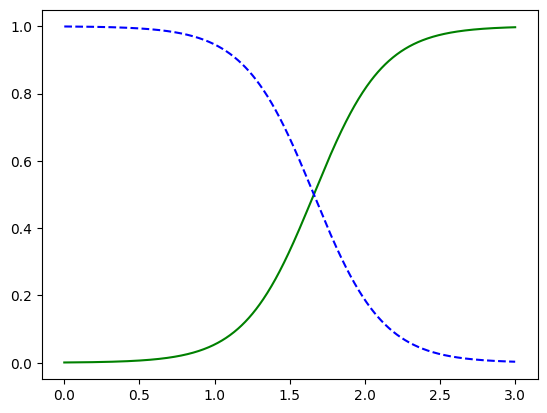

In [ ]:
import matplotlib.pyplot as plt
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],"g-",label="Iris virginia")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris virginia")

In [ ]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

# Decision Boundary

A decision boundary is the boundary in the feature space where a classifier switches from predicting one class to another. In the case of Logistic Regression, this boundary is where the predicted probability of belonging to the positive class is 0.5.

In the plot in cell InxsHSc2bvjC, the decision boundary would be the point on the x-axis (petal width) where the green line (probability of Iris virginica) crosses 0.5. For any point to the right of this boundary, the model predicts Iris virginica (probability > 0.5), and for any point to the left, it predicts not Iris virginica (probability < 0.5).

# SOFTMAX REGRESSION


Softmax Regression, also known as Multiclass Logistic Regression, is a generalization of Logistic Regression to handle multiple classes. While Logistic Regression is used for binary classification (predicting between two classes), Softmax Regression is used for multiclass classification (predicting among three or more classes).

Here's how it works:

**Linear Combination**: Similar to Logistic Regression, it calculates a weighted sum of the input features for each class. For example, if you have three classes, it will calculate three scores (one for each class) based on the input features and learned weights.

**Softmax Function**: Instead of the logistic function, Softmax Regression uses the softmax function to convert these scores into probabilities. The softmax function takes a vector of scores and squashes each score into a probability between 0 and 1, such that all the probabilities for a given instance sum up to 1. This allows you to interpret the output as the probability that the instance belongs to each class.

**Classification**: To make a classification decision, the class with the highest predicted probability is chosen as the predicted class for that instance.
Key Differences from Logistic Regression:

**Number of Classes**: Logistic Regression is for binary classification, while Softmax Regression is for multiclass classification.

Output Layer: Logistic Regression has a single output representing the probability of the positive class. Softmax Regression has an output layer with one node per class, and the softmax function provides probabilities for each class.

Cost Function: Softmax Regression typically uses the cross-entropy loss function, which is suitable for multiclass classification problems.
In essence, Softmax Regression allows you to directly predict the probabilities for each class in a multiclass problem, making it a convenient and effective algorithm for such tasks.

# CROSS ENTROPY

Cross-entropy is a measure used in the context of classification problems, particularly with models that output probabilities, like Logistic Regression and Softmax Regression. It quantifies the difference between the predicted probability distribution and the true probability distribution.

Here's a breakdown:

Understanding Probability Distributions:

True Distribution: In a classification problem, the true distribution represents the actual class of an instance. For a binary classification problem with two classes (e.g., Cat or Dog), if an image is truly a Cat, the true distribution would be [1, 0] (100% probability of being a Cat, 0% probability of being a Dog). If it's a Dog, the true distribution is [0, 1]. For multiclass problems, it's similar; for an instance belonging to class 3 out of 5, the true distribution might be [0, 0, 1, 0, 0].

Predicted Distribution: This is the probability distribution outputted by your model. For the same Cat/Dog example, your model might predict [0.8, 0.2] (80% probability of being a Cat, 20% probability of being a Dog).
What Cross-Entropy Measures:

Cross-entropy measures how "far apart" the predicted distribution is from the true distribution. A lower cross-entropy value means the predicted distribution is closer to the true distribution, indicating a better model. A higher cross-entropy value means the predicted distribution is further from the true distribution, indicating a worse model.

Why it's used as a Cost Function:

In training classification models, we want to minimize the difference between the predicted and true distributions. Cross-entropy serves as a suitable cost function for this purpose. By minimizing the cross-entropy, the model is encouraged to produce probability outputs that are as close as possible to the actual class labels.

Intuitive Analogy:

Imagine you have a target you're trying to hit (the true distribution). Your model's prediction is like where your arrow lands (the predicted distribution). Cross-entropy is a way of measuring how far your arrow landed from the target. You want to adjust your aim (the model's parameters) to minimize this distance (the cross-entropy).

In [ ]:
X = iris["data"][:,(2,3)]
Y = iris["target"]

In [ ]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmax_reg.fit(X,Y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
softmax_reg.predict([[5,2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5,2]])

array([[6.21626374e-07, 5.73689802e-02, 9.42630398e-01]])

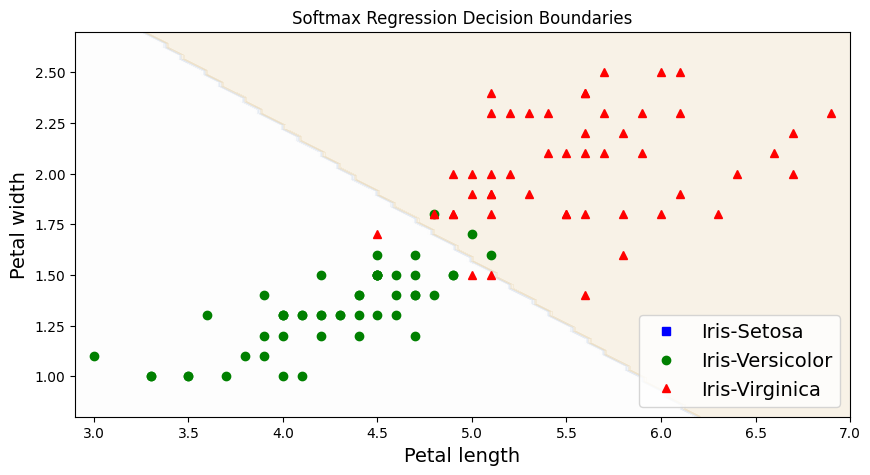

In [ ]:
# Define the decision boundary plot function
def plot_decision_boundaries(classifier, X, y, axes, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = classifier.predict(X_new).reshape(x1.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#fafafa','#ced9ea','#e8d5b0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "go", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "r^", label="Iris-Virginica")
        plt.axis(axes)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

# Plot the decision boundary
plt.figure(figsize=(10, 5))
plot_decision_boundaries(softmax_reg, X, Y, axes=[2.9, 7, 0.8, 2.7], legend=True)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("Softmax Regression Decision Boundaries")
plt.show()


# END

---

